# **Relatório – Trabalho Final**

## **Disciplina: Métodos Quantitativos para Análise Multivariada**
### **Docente:** Esteban Fernandez Tuesta
#### Dezembro de 2022  

> **Grupo 11:**  
> – Alexandre Kira Pedroso de Lima (4749913)  
> – Eduardo dos Santos Fiedler (4938500)  
> – Gustavo Henrique de Lima Sá (12542863)  
> – Lucas da Silva Serralheiro Gigante (12691898)  
> – Nicolas Uhr Braga (12608622)  



##**Introdução**


De acordo com Crescenzi e Rodríguez-Pose¹, é notória a heterogeneidade nas condições socioeconômicas em países em desenvolvimento. No Brasil, a gigantesca dimensão geográfica e territorial promove distintas capacidades de fomento do avanço econômico e científico. O entendimento da relação entre os níveis de produção científica e econômica permite a identificação de pontos de melhoria para o cenário brasileiro.

O presente relatório é um requisito para obtenção de nota na disciplina de Métodos Quantitativos para Análise Multivariada, ministrada no quarto semestre do curso de Sistemas de Informação da Escola de Artes, Ciências e Humanidades (EACH-USP). Foi solicitada a elaboração de um trabalho final envolvendo a análise de um conjunto de dados, o qual foi fornecido pelo professor responsável. Essa atividade teve o intuito de consolidar os temas vistos em aula e complementar com uma aplicação sobre dados reais.

A seção da metodologia tratará das validações e operações realizadas sobre os conjuntos de dados fornecidos, acompanhados de trechos de código, quando pertinente. A seção referente às conclusões contemplará os expostos dos resultados mais relevantes ao trabalho, concluindo o relatório.

Cabe ressaltar que apesar da validação de consistência ter sido aplicada de modo idêntico nos programas em R e Python, foi acordado entre o grupo de oferecer diferentes análises em cada linguagem, de modo a utilizar variáveis diferentes e enriquecer o trabalho.

---
¹CRESCENZI, R.; RODRÍGUEZ-POSE, A. *An integrated framework for the comparative
analysis of the territorial innovation dynamics of developed and emerging countries*. Journal of Economic Surveys, v. 26, n. 3, p. 517-533, 2012.

## **Metodologia**

A metodologia levou em conta a preparação e manipulação dos conjuntos de dados fornecidos pelo professor responsável, assim como as diretrizes previstas no enunciado dado:

- Agrupar os artigos de um pesquisador por instituição ao qual ele está associado. ✅

- Juntar todas as informações possíveis (produção científica e atividade econômica). ✅

- Extrair a maior quantidade de conclusões possíveis a respeito da interação ou influência da atividade científica sobre a econômica. ✅

- Estudar a posição das instituições nas principais localidades, podendo agrupar os dados de acordo com a microrregião/mesorregião (para as atividades econômicas) ou por estado (para as atividades científicas). ✅

Nesse contexto, em linhas gerais, as etapas do trabalho são as seguintes:

**Etapa 1: Importação de bibliotecas e validação dos datasets**  

**Etapa 2: Agrupamento de dados**  

**Etapa 3: Verificação de correlações: aplicação de técnicas de análise multivariada**  

**Etapa 4: Conclusões alcançadas**   

A numeração das etapas diz respeito à subseção correspondente do desenvolvimento, que será discutido a seguir.

*Vale comentar novamente que a maior parte das análises são comuns tanto ao relatório feito em R quanto ao de Python. Porém, outras foram feitas unicamente em R ou Python.*


## **Desenvolvimento**

### **Etapa 1: Importação de bibliotecas e validação dos datasets**

Nesta etapa, foi realizado o pré-processamento dos conjuntos de dados, importando cada base de dados e verificando possíveis limitações e inconsistências.

O tratamento e leitura dos dados foi realizado a partir do uso de importantes bibliotecas do Python. Pandas foi a responsável por realizar a leitura e manipulação de instâncias dos arquivos. Outras bibliotecas foram usadas com intuito de visualização dos dados, plotagem e operações com arrays multidimensionais. Além disso, foi necessária a instalação de duas dependências para a leitura de arquivos `.xlsx`.

In [ ]:
# Importando bibliotecas iniciais
import pandas as pd
import seaborn as sns
import matplotlib as mp
import numpy as np
from google.colab import drive

# Bibliotecas de plotagem
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import os

# Importando dependências
## Para conseguir ler de arquivo '.xlsx'
!pip install -q xlrd

A leitura de cada arquivo se deu utilizando a biblioteca *drive*, enquanto a pandas foi responsável por atribuir cada arquivo a uma estrutura de dados (*DataFrames*).

Para rodar o programa em Python sem erros, deve-se mover os arquivos do trabalho para a raiz do seu Google Drive, fora de qualquer pasta. No código a seguir, será requisitado o login na conta Google, e após confirmação, os arquivos salvos no Drive serão lidos automaticamente.

Quanto ao arquivo `PIB dos Municípios - base de dados 2010-2015.xlsx`, nós o recebemos com a coluna "Ano" sem nome, e não sabemos se a planilha original continha este erro ou se algum aluno alterou o arquivo. Logo, por via das dúvidas, informamos que foi adicionado o nome Ano na coluna.

In [ ]:
# Importando os datasets
# IMPORTANTE: definir o caminho de diretórios até o arquivo
drive.mount('/content/drive')
publicacoes = pd.read_csv(open('/content/drive/MyDrive/Dados_de_Publicacoes.txt', 'r'), sep='\t',  encoding='ISO-8859-1', low_memory=False, header=[0]) # Dados_de_Publicacoes.txt
instituicoes = pd.read_csv('/content/drive/MyDrive/Instituicoes_nova.txt', sep='\t',  encoding='ISO-8859-1')
subdisciplinas = pd.read_excel('/content/drive/MyDrive/Subdisciplinas.xlsx')
# Foi feita uma cópia do arquivo e adicionada a legenda "Ano" na coluna dos anos, que estava vazia
pib_municipios = pd.read_excel('/content/drive/MyDrive/PIB dos Municípios - base de dados 2010-2015.xlsx')
estab2010 = pd.read_csv('/content/drive/MyDrive/RAIS_N_ESTABELECIMENTOS_2010.csv', # RAIS_N_ESTABELECIMENTOS_2010.csv
    skiprows=1, encoding='latin1', sep=';').iloc[:-4,:]
estab2011 = pd.read_csv('/content/drive/MyDrive/RAIS_N_ESTABELECIMENTOS_2011.csv', # RAIS_N_ESTABELECIMENTOS_2011.csv
    skiprows=1, encoding='latin1', sep=';').iloc[:-4,:]
estab2012 = pd.read_csv('/content/drive/MyDrive/RAIS_N_ESTABELECIMENTOS_2012.csv', # RAIS_N_ESTABELECIMENTOS_2012.csv
    skiprows=1, encoding='latin1', sep=';').iloc[:-4,:]
estab2013 = pd.read_csv('/content/drive/MyDrive/RAIS_N_ESTABELECIMENTOS_2013.csv', # RAIS_N_ESTABELECIMENTOS_2013.csv
    skiprows=1, encoding='latin1', sep=';').iloc[:-4,:]
estab2014 = pd.read_csv('/content/drive/MyDrive/RAIS_N_ESTABELECIMENTOS_2014.csv', # RAIS_N_ESTABELECIMENTOS_2014.csv
    skiprows=1, encoding='latin1', sep=';').iloc[:-4,:]
estab2015 = pd.read_csv('/content/drive/MyDrive/RAIS_N_ESTABELECIMENTOS_2015.csv', # RAIS_N_ESTABELECIMENTOS_2015.csv
    skiprows=1, encoding='latin1', sep=';').iloc[:-4,:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### **1.1. Verificações dos *datasets***

##### **1.1.1. Dados de Publicações**
Arquivo: `Dados_de_Publicacoes.txt`

A variável escolhida para guardar esta base de dados no Python foi
`publicacoes` e, logo após a importação, já foi possível identificar o
grande volume de dados nesta base, totalizando 739063 linhas com 9
variáveis cada uma. Os campos desta base de dados são:

- `id` **(numeric):** identifica de forma única o autor do artigo;
- `id_institution` **(character):** identifica de forma única a instituição e sua unidade federativa, na qual o autor está vinculado;
- `year` **(numeric):** ano da publicação do artigo;
- journal **(numeric):** identifica de forma única o jornal onde o artigo foi publicado;
- `subdiscipline` **(numeric):** identifica de forma única a subdisciplina na qual o artigo se enquadra;
- `number_of_authors_publication` **(numeric):** quantidade de autores na publicação;
- `weight_authorship` **(numeric):** peso do autor específico identificado pelo id na linha da publicação (1/quantidade de autores);
- `weight_journal_indexation` **(numeric):** indica em quantas sub-disciplinas está indexada a revista. Quanto mais específica for a revista, ou seja, ter menos sub-disciplinas associadas, maior é o peso do artigo para o peso final;
- `weight_final` **(numeric):** é o resultado da multiplicação do weight_authorship pelo `weight_journal_indexation`.

Nesta primeira referência de dados, foi realizar uma padronização na identificação das variáveis, a qual será utilizada para dados futuros. Houve a troca do nome da variável `id` para `id_author`, de forma a caracterizá-la melhor.
Outro ponto verificado foi o de que o `id_institution` guarda não somente
o id, mas também o código da unidade federativa. Desta forma, foi tomada
a decisão de renomear a variável `id_institution` para `id_institution_id_state`, e a separação dos dados ocorrerá posteriormente.

In [ ]:
publicacoes.rename(columns={'id': 'id_author', 'id_institution': 'id_institution_id_state'}, inplace = True)

Algumas verificações foram realizadas para verificar a composição e
consistência dos dados, são elas:

- Identificar se um artigo contido na base de dados realizado por mais de um autor tem todos os autores referenciados na base de dados;

- Verificar se os jornais são mais específicos com poucas subdisciplinas ou se os jornais são mais genéricos com mais subdisciplinas.

In [ ]:
# Agrupando os dados de publicacoes por jornal e somando os pesos de cada autor
publicacoes_peso_autores = publicacoes.groupby(by='journal')['weight_authorship'].sum().reset_index(name = 'soma_peso_dos_autores')
display(publicacoes_peso_autores)

,journal,soma_peso_dos_autores
0,188,0.333333
1,204,2.000000
2,214,1.000000
3,218,0.500000
4,219,4.297222
...,...,...
8171,25397,0.045455
8172,25398,7.006016
8173,25402,1.500000
8174,25416,3.027778


É importante destacar que caso todos os autores de um determinado artigo
estejam cadastrados na base de dados, o resultado da soma dos pesos
destes autores deveria ser maior do que zero.

Nota-se da tabela, que muitos destes valores não são inteiros positivos, indicando que um ou mais autores não estão cadastrados na base de dados. Como exemplo, para o *journal* "188" onde a soma dos pesos foi de 0,33, isso indica que somente um autor de um artigo que contém três autores está cadastrado na base de dados.

Isto acaba impactando a quantidade de artigos por região, como será visto
mais a frente. Para estes casos específicos, está sendo adotado neste
trabalho que os autores não cadastrados na base de dados são vinculados
a regiões estrangeiras e que o objeto de seus estudos não impactam a
economia local, logo, sendo retirados do conjunto de dados.

In [ ]:
# Guardando os jornais cujo peso é maior que 1
publicacoes_peso_autores_1 = publicacoes_peso_autores.loc[publicacoes_peso_autores['soma_peso_dos_autores'] >= 1].reset_index(drop=True)
publicacoes_peso_autores_1

,journal,soma_peso_dos_autores
0,204,2.000000
1,214,1.000000
2,219,4.297222
3,223,27.954670
4,230,2.529365
...,...,...
6252,25394,5.500000
6253,25398,7.006016
6254,25402,1.500000
6255,25416,3.027778


Agora, vamos identificar se as publicações pertencem a jornais mais genéricos (muitas subdisciplinas) ou específicos (poucas ou apenas uma subdisciplina).

In [ ]:
qtd_pub_por_peso_journal = publicacoes.groupby(by='weight_journal_indexation')['weight_authorship'].sum().reset_index(name = 'soma_peso_dos_autores')
qtd_pub_por_peso_journal

,weight_journal_indexation,soma_peso_dos_autores
0,0.012195,3366.904364
1,0.012987,352.961824
2,0.013333,4640.521908
3,0.013514,114.569192
4,0.022222,422.498876
5,0.027027,2130.513205
6,0.047619,514.825000
7,0.055556,1243.450141
8,0.062500,172.292241
9,0.125000,30.514286


(array([1.29585368e+04, 3.05142857e+01, 2.78380833e+03, 9.23451349e+01,
        4.97106290e+02, 0.00000000e+00, 0.00000000e+00, 1.21320097e+03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.31261674e+05]),
 array([0.01219512, 0.07804878, 0.14390244, 0.2097561 , 0.27560976,
        0.34146341, 0.40731707, 0.47317073, 0.53902439, 0.60487805,
        0.67073171, 0.73658537, 0.80243902, 0.86829268, 0.93414634,
        1.        ]),
 <a list of 15 Patch objects>)

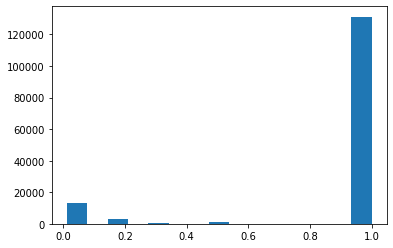

In [ ]:
x = qtd_pub_por_peso_journal['weight_journal_indexation']
y = qtd_pub_por_peso_journal['soma_peso_dos_autores']

plt.hist(qtd_pub_por_peso_journal.weight_journal_indexation, weights=qtd_pub_por_peso_journal.soma_peso_dos_autores, bins=15)

Nota-se que a imensa maioria dos artigos foram publicados em jornais com somente uma subdisciplina, ou seja possuem peso igual a um, de forma que, a depender da análise, não há grandes perdas em selecionar somente jornais deste tipo.

Assim, o dataset utilizado nas análises será o `publicacoes_filtrado`, contando com os seguintes filtros:
- Soma do peso dos autores por jornal > 1
- Peso de indexação do jornal = 1

In [ ]:
# Dataset filtrado a ser utilizado
publicacoes_filtrado = publicacoes[publicacoes.journal.isin(publicacoes_peso_autores_1.journal)].reset_index(drop=True)
publicacoes_filtrado = publicacoes[publicacoes.weight_journal_indexation == 1].reset_index(drop=True)

# Removendo o estado do ID da instituição
publicacoes_filtrado.rename(columns={'id_institution_id_state': 'id_institution'}, inplace = True)
publicacoes_filtrado['id_institution'] = publicacoes_filtrado['id_institution'].map(lambda x: x[:12])

display(publicacoes_filtrado)

,id_author,id_institution,year,journal,sub-discipline,number_of_authors_publication,weight_authorship,weight_journal_indexation,weight_final
0,1.0,867100000004,2014,11138,75,6,0.166667,1.0,0.166667
1,1.0,867100000004,2014,16800,449,5,0.200000,1.0,0.200000
2,1.0,867100000004,2013,5040,522,5,0.200000,1.0,0.200000
3,1.0,867100000004,2013,4690,519,5,0.200000,1.0,0.200000
4,1.0,867100000004,2012,4503,161,4,0.250000,1.0,0.250000
...,...,...,...,...,...,...,...,...,...
629282,122011.0,020200000009,2013,6020,125,659,0.001517,1.0,0.001517
629283,122011.0,020200000009,2013,14761,13,660,0.001515,1.0,0.001515
629284,122011.0,020200000009,2013,10476,125,659,0.001517,1.0,0.001517
629285,122011.0,020200000009,2013,10476,125,625,0.001600,1.0,0.001600


##### **1.1.2. Instituições**
Arquivo: `Instituicoes.txt`

A variável escolhida para guardar esta base de dados no Python foi
`instituicoes`. Os campos desta base de dados são:
- `InstitutionID` **(character):** definição já discutida anteriormente;
- `InstitutionName` **(character):** nome correlacionado ao código id da instituição;
- `State_ID` **(numeric):** Unidade Federativa da instituição;
- `Mesoregion_ID` **(numeric):** identifica de forma única a macro região onde a instituição está localizada;
- `Microregion_ID` **(numeric):** identifica de forma única a micro região onde a instituição está localizada;
- `Municipality_ID` **(numeric):** código único que identifica o município;
- `Municipality_Name` **(character):** nome do município onde a instituição está localizada.

Nesta referência de dados, foi possível observar uma forma de identificação de colunas não padronizada, desta forma foi realizado uma troca dos valores das colunas para padronização conforme a seguir:

- De `InstitutionID` para `id_institution`;
- De `InstitutionName` para `institution`name`;
- De `State_ID` para `id_state`;
- De `Mesoregion_ID` para `id_mesoregion`;
- De `Microregion_ID` para `id_microregion`;
- De `Municipality_ID` para `id_municipality`;
- De `Municipality_Name` para `name_municipality`;

In [ ]:
# Renomeando algumas colunas
instituicoes.rename(columns={'InstitutionID': 'id_institution', 'InstitutionName': 'institution_name', 'State_ID': 'id_state', 'Mesoregion_ID': 'id_mesoregion', 'Microregion_ID': 'id_microregion', 'Municipality_ID': 'id_municipality', 'Municipality_Name': 'name_municipality'}, inplace = True)
# Passando os valores de ID para string, e assim poder compará-los futuramente
instituicoes['id_mesoregion'] = instituicoes['id_mesoregion'].astype(str)
instituicoes['id_microregion'] = instituicoes['id_microregion'].astype(str)
display(instituicoes)

,id_institution,institution_name,id_state,id_mesoregion,id_microregion,id_municipality,name_municipality
0,000100000002,UNIVERSIDADE FEDERAL DO MARANHAO,21,210001,210002,2111300,São Luís
1,000101000995,UNIVERSIDADE ESTADUAL DE GOIAS,52,520003,520007,5201108,Anápolis
2,000102001995,SERVICO DE FISIOTERAPIA,35,350015,350061,3550308,São Paulo
3,000103000003,UNIVERSIDADE FEDERAL DO MARANHAO,21,210001,210002,2111300,São Luís
4,000104000007,UNIVERSIDADE FEDERAL DO MARANHAO,21,210001,210002,2111300,São Luís
...,...,...,...,...,...,...,...
4099,JVE600000009,FACULDADE SAO FRANCISCO DE JUAZEIRO,29,290002,290004,2918407,Juazeiro
4100,JVLU00000003,IPANEMA INDUSTRIA DE PRODUTOS VETERINARIOS,35,350012,350046,3502903,Araçoiaba da Serra
4101,JVOZ00000007,HOSPITAL FUNDACAO BANCO DE OLHOS DE GOIAS,52,520003,520010,5208707,Goiânia
4102,JVVI00000008,CENTRO DE ESTUDOS DE PESSOAL DO FORTE DUQUE DE...,33,330006,330018,3304557,Rio de Janeiro


Algumas verificações foram realizadas para verificar a composição e
consistência dos dados, são elas:

-  Verificação do caso de uma instituição estar localizada em diferentes unidades federativas;

-  Agrupamentos que podem identificar alguma inconsistência do *dataset*.

In [ ]:
# [TODO] Somar por estado
qtd_unidades = instituicoes.groupby(by=['id_institution', 'institution_name','id_state'])['institution_name'].count().reset_index(name = 'qtd').sort_values(by='institution_name')
display(qtd_unidades)

,id_institution,institution_name,id_state,qtd
6,000200000993,A C CAMARGO CANCER CENTER,35,1
1410,577500000000,ABEU CENTRO UNIVERSITARIO,33,1
256,011200000000,ACADEMIA BRASILEIRA DE CIENCIAS,33,1
1686,890300000002,AGENCIA ESPACIAL BRASILEIRA,53,1
3167,J2UK00000002,ANHANGUERA EDUCACIONAL,33,1
...,...,...,...,...
3274,J43100000003,YARA BRASIL FERTILIZANTES,43,1
3649,J99300000002,YESSINERGY AGROINDUSTRIAL LTDA,35,1
3886,JESJ00000009,YLLER BIOMATERIAIS,43,1
3536,J7XQ00000004,YOKI ALIMENTOS,51,1


Nota-se que a nova base de dados possui a mesma instituição com diferentes IDs, indicando possivelmente a existência de vários *campi*, contudo, não há nenhuma instituição com referência a mais do que a um estado, Ocorre que este comportamento está registrado na base `publicacoes` e, dessa forma, decidiu-se utilizar esta localização única de uma instituição como se fosse o escritório central do instituto e nunca para a localização de uma publicação.

In [ ]:
# Verificando a relação entre as variáveis de localidade
instituicoes_view = instituicoes.groupby(by=['id_state', 'id_mesoregion', 'id_microregion', 'id_municipality'])['id_state'].count().reset_index(name = 'qtd_instituicoes')
display(instituicoes_view)

,id_state,id_mesoregion,id_microregion,id_municipality,qtd_instituicoes
0,11,110001,110001,1100205,16
1,11,110002,110003,1100023,3
2,11,110002,110004,1100122,2
3,11,110002,110006,1100049,2
4,11,110002,110006,1100288,2
...,...,...,...,...,...
647,52,520005,520015,5216007,1
648,52,520005,520016,5221809,2
649,52,520005,520017,5205109,2
650,52,520005,520017,5215504,1


In [ ]:
# Verificando se uma mesoregião corresponde somente a um único Estado
qtd_inst_por_mesoregiao = instituicoes.groupby(by=['id_state', 'id_mesoregion'])['id_mesoregion'].count().reset_index(name = 'qtd_instituicoes')
display(qtd_inst_por_mesoregiao)

,id_state,id_mesoregion,qtd_instituicoes
0,11,110001,16
1,11,110002,11
2,13,130002,1
3,13,130003,61
4,15,150001,10
...,...,...,...
119,51,510005,12
120,52,520003,70
121,52,520004,2
122,52,520005,21


In [ ]:
# Verificando se uma microregião corresponde somente a uma macroregião
qtd_inst_por_microregiao = instituicoes.groupby(by=['id_mesoregion', 'id_microregion'])['id_microregion'].count().reset_index(name = 'qtd_instituicoes')
display(qtd_inst_por_microregiao)

,id_mesoregion,id_microregion,qtd_instituicoes
0,110001,110001,16
1,110002,110003,3
2,110002,110004,2
3,110002,110006,4
4,110002,110007,1
...,...,...,...
333,520005,520013,12
334,520005,520015,4
335,520005,520016,2
336,520005,520017,3


In [ ]:
# Verificando se uma município corresponde somente a uma microregião
qtd_inst_por_municipio = instituicoes.groupby(by=['id_microregion', 'id_municipality'])['id_municipality'].count().reset_index(name = 'qtd_instituicoes')
display(qtd_inst_por_municipio)

,id_microregion,id_municipality,qtd_instituicoes
0,110001,1100205,16
1,110003,1100023,3
2,110004,1100122,2
3,110006,1100049,2
4,110006,1100288,2
...,...,...,...
647,520015,5216007,1
648,520016,5221809,2
649,520017,5205109,2
650,520017,5215504,1


Da análise dos dados, é possível observar que um estado pode possuir diferentes mesorregiões, que por sua vez podem possuir diferentes microrregiões, que por sua vez podem possuir diferentes municípios, que por fim podem ser local de diferentes instituições. Não há mesorregiões que pertençam a diferentes Estados, e o mesmo vale para as microrregiões e municípios.

##### **1.1.3. Subdisciplinas**
Arquivo: `Subdisciplinas.xlsx`


A variável escolhida para guardar esta base de dados no Python foi
`subdisciplinas`. Os campos desta base de dados são:
- `subd_id` **(numeric):** código de identificação único de uma subdisciplina;
- `subd_name` **(character):** nome da subdisciplina;
- `disc_id` **(numeric):** código de identificação único de uma disciplina.

Duas verificações foram realizadas para verificar a composição e
consistência dos dados, são elas:

-   Verificação se a relação entre uma disciplina e uma subdisciplina é do tipo (`1:n`);

-   Verificação se os nomes das subdisciplinas são únicos.

In [ ]:
# Verificando se cada subdisciplina está associada a somente uma disciplina
subd_view = subdisciplinas.groupby(by=['subd_id','subd_name'])['disc_id'].count().reset_index(name='disciplina_associada')
display(subd_view)

,subd_id,subd_name,disciplina_associada
0,1,Clinical Cancer Research,1
1,2,Circulation,1
2,3,Data Mining,1
3,4,Protein Science,1
4,5,Signal Processing,1
...,...,...,...
549,550,Bulk Solid Handling,1
550,551,Wetlands,1
551,552,GIS (non English),1
552,553,Hydraulics,1


In [ ]:
# Verificando se cada disciplina contém várias subdisciplinas
subd_view2 = subdisciplinas.groupby('disc_id')['subd_id'].count().reset_index(name='subdisciplinas_associadas')
display(subd_view2)

,disc_id,subdisciplinas_associadas
0,1,43
1,2,11
2,3,69
3,4,76
4,5,32
5,6,22
6,7,57
7,8,28
8,9,26
9,10,23


In [ ]:
# Verificando se há nomes repetidos de subdisciplinas
subd_view = subdisciplinas.groupby('subd_name')['subd_name'].count().reset_index(name='repet_subd_name')
display(subd_view)

,subd_name,repet_subd_name
0,AIDS Research,1
1,AIDS Treatment,1
2,Acoustics,1
3,Addictive Behavior,1
4,Aeronautics & Astronautics,1
...,...,...
549,Wood Components,1
550,Wool,1
551,World Health Organization,1
552,World Trade; Law,1


Com as consultas acima, foi possível confirmar a relação (`1:n`) entre disciplina e subdisciplina, e também a unicidade dos nomes das subdisciplinas.

##### **1.1.4. PIB dos Municípios (2010-2015)**
Arquivo: `PIB dos Municípios - base de dados 2010-2015.xlsx`


A variável escolhida para guardar esta base de dados no Python foi
`pib_municipios`. Esta base de dados tem inúmeros campos e muitos deles não serão utilizados na análise deste trabalho, desta forma, ficará salvo na variável `pib_municipios` somente as variáveis:
- year **(character):** ano do PIB. Necessário mudar o tipo de dado para *numeric*;
- `id_state` **(numeric):** Unidade Federativa da instituição;
- `name_state` **(character):** nome da unidade da federaçao;
- `id_municipality` **(numeric):** código único que identifica o município;
- `name_municipality` **(character):** nome do município onde a instituição está localizada;
- `pib` **(numeric):** produto interno bruto;
- `population` **(numeric):** população do municipio.

In [ ]:
# Removendo colunas irrelevantes
pib_municipios_filtrado = pib_municipios.drop(pib_municipios.columns[[5,10,11,12,13,14,15,16,20,21]],axis = 1)
# Convertendo ano (character) par int
pib_municipios_filtrado['Ano'] = pib_municipios_filtrado['Ano'].astype(int)

# Adicionando os zeros que faltavam nos códigos da meso e microrregião
pib_municipios_filtrado['Código da Mesorregião'] = pib_municipios_filtrado['Código da Mesorregião'].astype(str)
pib_municipios_filtrado['Código da Mesorregião'] = pib_municipios_filtrado['Código da Mesorregião'].map(lambda x: x[:2] + '00' + x[2:])

pib_municipios_filtrado['Código da Microrregião'] = pib_municipios_filtrado['Código da Microrregião'].astype(str)
pib_municipios_filtrado['Código da Microrregião'] = pib_municipios_filtrado['Código da Microrregião'].map(lambda x: x[:2] + '0' + x[2:])

pib_municipios_filtrado.rename(columns={'Ano': 'ano', 'Código da Unidade da Federação': 'state_id', 'Nome da Unidade da Federação': 'name_state', 'Código do Município': 'id_municipality', 'Nome do Município':'name_municipality', 'Código da Mesorregião':'id_mesoregion', 'Nome da Mesorregião':'name_mesoregion','Código da Microrregião':'id_microregion','Nome da Microrregião':'name_microregion','População\n(Nº de habitantes)':'populacao','Produto Interno Bruto per capita\n(R$ 1,00)':'pib_percapita', 'Atividade com maior valor adicionado bruto':'atividade_princ'}, inplace = True)

pib_municipios_filtrado['pib_bruto'] = round(pib_municipios_filtrado['pib_percapita'] * pib_municipios_filtrado['populacao'],2)

display(pib_municipios_filtrado)

,ano,state_id,name_state,id_municipality,name_municipality,id_mesoregion,name_mesoregion,id_microregion,name_microregion,populacao,pib_percapita,atividade_princ,pib_bruto
0,2010,11.0,Rondônia,1100015,Alta Floresta D'Oeste,110002,Leste Rondoniense,110006,Cacoal,24422.0,10731.18,"Administração, defesa, educação e saúde públic...",2.620769e+08
1,2010,11.0,Rondônia,1100023,Ariquemes,110002,Leste Rondoniense,110003,Ariquemes,90354.0,15103.86,"Administração, defesa, educação e saúde públic...",1.364694e+09
2,2010,11.0,Rondônia,1100031,Cabixi,110002,Leste Rondoniense,110008,Colorado do Oeste,6309.0,11033.62,"Administração, defesa, educação e saúde públic...",6.961111e+07
3,2010,11.0,Rondônia,1100049,Cacoal,110002,Leste Rondoniense,110006,Cacoal,78601.0,15095.15,"Administração, defesa, educação e saúde públic...",1.186494e+09
4,2010,11.0,Rondônia,1100056,Cerejeiras,110002,Leste Rondoniense,110008,Colorado do Oeste,17030.0,13037.06,"Administração, defesa, educação e saúde públic...",2.220211e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33400,2015,52.0,Goiás,5222005,Vianópolis,520005,Sul Goiano,520016,Pires do Rio,13456.0,23237.24,Demais serviços,3.126803e+08
33401,2015,52.0,Goiás,5222054,Vicentinópolis,520005,Sul Goiano,520015,Meia Ponte,8171.0,39480.36,"Agricultura, inclusive apoio à agricultura e a...",3.225940e+08
33402,2015,52.0,Goiás,5222203,Vila Boa,520004,Leste Goiano,520012,Entorno de Brasília,5495.0,18992.37,"Agricultura, inclusive apoio à agricultura e a...",1.043631e+08
33403,2015,52.0,Goiás,5222302,Vila Propício,520004,Leste Goiano,520012,Entorno de Brasília,5578.0,35691.39,"Agricultura, inclusive apoio à agricultura e a...",1.990866e+08


Na verificação de consistência, além da adequação do nome das variáveis e dos dados dos IDs da meso e microrregião, foi realizada a alteração do tipo da variável `ano` de *character* para *numeric*.

##### **1.1.5. Atividades econômicas desenvolvidas contadas pelo número de estabelecimentos em cada prefeitura por ano**

Arquivos:

`RAIS_N_ESTABELECIMENTOS_2010.csv`, `RAIS_N_ESTABELECIMENTOS_2011.csv`, `RAIS_N_ESTABELECIMENTOS_2012.csv`, `RAIS_N_ESTABELECIMENTOS_2013.csv`, `RAIS_N_ESTABELECIMENTOS_2014.csv` e `RAIS_N_ESTABELECIMENTOS_2015.csv`

In [ ]:
# Retirando as linhas referente ao total de produção
estab2010.drop(estab2010.index[5658:5660], inplace=True)
estab2011.drop(estab2011.index[5658:5660], inplace=True)
estab2012.drop(estab2012.index[5658:5660], inplace=True)
estab2013.drop(estab2013.index[5658:5660], inplace=True)
estab2014.drop(estab2014.index[5658:5660], inplace=True)
estab2015.drop(estab2015.index[5658:5660], inplace=True)

As seis bases de dados acima exigiram o mesmo tratamento no pré-processamento dos dados, que basicamente consistiram na adequação das informações em um *dataframe*, na exclusão das últimas linhas de cada base de dados e que não representavam informações de um determinado município, como por exemplo a linha de totalização de todos os valores da tabela.

### **Etapa 2: Agrupamento de dados**

O primeiro agrupamento se deu de modo a satisfazer uma das condições previstas pelo professor. A tabela abaixo representa o agrupamento dos artigos de um pesquisador por instituição ao qual ele está associado:

In [ ]:
publicacoes_agrup_artigos = pd.merge(publicacoes_filtrado, instituicoes, on=['id_institution'])
publicacoes_agrup_artigos_view = publicacoes_agrup_artigos.groupby(['year','id_institution','institution_name', 'id_author'])['id_author'].count().reset_index(name='qtd_artigos_author').sort_values(by='id_author')
display(publicacoes_agrup_artigos_view)

,year,id_institution,institution_name,id_author,qtd_artigos_author
137253,2012,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1.0,3
41320,2010,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1.0,3
88106,2011,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1.0,3
239019,2014,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1.0,2
188281,2013,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1.0,2
...,...,...,...,...,...
35988,2010,171500000005,UNIVERSIDADE SAO FRANCISCO,122010.0,5
217404,2014,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,122011.0,30
265848,2015,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,122011.0,34
166544,2013,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,122011.0,29


In [ ]:
publicacoes_agrup_artigos_view2 = publicacoes_agrup_artigos.groupby(['id_institution','institution_name', 'id_author'])['id_author'].count().reset_index(name='qtd_artigos_author').sort_values(by='id_author')
display(publicacoes_agrup_artigos_view2)

,id_institution,institution_name,id_author,qtd_artigos_author
105307,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1.0,13
88110,121100000001,CENTRO UNIVERSITARIO FRANCISCANO,2.0,2
74989,033400000004,UNIVERSIDADE FEDERAL DE OURO PRETO,3.0,2
58118,024700000000,INSTITUTO ADOLFO LUTZ,4.0,2
90321,198100000000,UNIVERSIDADE TECNOLOGICA FEDERAL DO PARANA,5.0,1
...,...,...,...,...
54751,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,122008.0,123
54752,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,122009.0,91
89486,171500000005,UNIVERSIDADE SAO FRANCISCO,122010.0,16
54753,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,122011.0,93


Como solicitado, também foi realizado um ponto de corte para a obtenção desse agrupamento. Nesse sentido, foi verificado no *dataset* instituições quais eram as instituições que, entre 2010 e 2015, produziram menos que 5 artigos ao total, e então seus registros, assim como de seus autores e publicações, foram dispensados.

In [ ]:
# Verificando o total de artigos por instituição entre 2010-2015
artigos_por_inst = publicacoes_agrup_artigos_view2.groupby(['institution_name'])['qtd_artigos_author'].count().reset_index(name='total_artigos_2010_2015')
display(artigos_por_inst)

,institution_name,total_artigos_2010_2015
0,A C CAMARGO CANCER CENTER,1244
1,ABEU CENTRO UNIVERSITARIO,3
2,ANVISA,125
3,ASSOCIACAO BRASILEIRA DE TECNOLOGIA DE LUZ SIN...,250
4,ASSOCIACAO DE CARIDADE SANTA CASA DO RIO GRANDE,2
...,...,...
1421,VERDARTIS DESENVOLVIMENTO BIOTECNOLOGICO,1
1422,VOLKSWAGEN DO BRASIL LTDA,3
1423,VOLVO DO BRASIL VEICULOS,3
1424,WCS BRASIL AMAZONIA,3


In [ ]:
# Limpando as instituições que produziram menos de 10 artigos entre 2010-2015
artigos_por_inst = artigos_por_inst.loc[artigos_por_inst['total_artigos_2010_2015'] >= 5].reset_index(drop=True)
artigos_por_inst

,institution_name,total_artigos_2010_2015
0,A C CAMARGO CANCER CENTER,1244
1,ANVISA,125
2,ASSOCIACAO BRASILEIRA DE TECNOLOGIA DE LUZ SIN...,250
3,ASSOCIACAO INSTITUTO NACIONAL DE MATEMATICA PU...,69
4,ASSOCIACAO PAULISTA PARA O DESENVOLVIMENTO DA ...,19
...,...,...
759,UNIVERSIDADE VALE DO RIO VERDE,11
760,UNIVERSIDADE VEIGA DE ALMEIDA,45
761,VALE S A,12
762,VALLEE MATRIZ,5


A tabela finalizada é mostrada abaixo. É indicada a instituição, seus autores, quantos artigos publicaram (2010-2015), o total de artigos publicados pela instituição (2010-2015) e a taxa entre a produção individual e o total.

In [ ]:
# Removendo autores de instituições cuja produção total de artigos foi inferior a 10
inst_describe = pd.merge(publicacoes_agrup_artigos_view2, artigos_por_inst.drop_duplicates(), on=['institution_name'])

# Calculando a taxa de artigos de um autor pelo total
inst_describe.loc[:,"media_autor_anual"] = 0
inst_describe.loc[:,"media_inst_anual"] = 0
inst_describe["media_autor_anual"] = round(inst_describe["qtd_artigos_author"] / 6,2)
inst_describe["media_inst_anual"] = round(inst_describe["total_artigos_2010_2015"] / 6,2)
display(inst_describe)

,id_institution,institution_name,id_author,qtd_artigos_author,total_artigos_2010_2015,media_autor_anual,media_inst_anual
0,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1.0,13,324,2.17,54.00
1,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,276.0,5,324,0.83,54.00
2,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,652.0,5,324,0.83,54.00
3,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,869.0,12,324,2.00,54.00
4,867100000004,UNIVERSIDADE FEDERAL DE ALFENAS,1002.0,1,324,0.17,54.00
...,...,...,...,...,...,...,...
112967,871600000001,HOSPITAL FEMINA,85078.0,3,5,0.50,0.83
112968,871600000001,HOSPITAL FEMINA,93577.0,1,5,0.17,0.83
112969,871600000001,HOSPITAL FEMINA,99251.0,1,5,0.17,0.83
112970,871600000001,HOSPITAL FEMINA,115247.0,8,5,1.33,0.83




---



O segundo agrupamento levou em conta outra condição proposta pelo professor. Foi pedido um estudo da posição das instituições conforme atividade econômica e científica.

Começando o mapeamento a partir da atividade científica, pesquisaremos as principais localidades e então verificaremos a distribuição das instituições nesses lugares.

In [ ]:
# Gerando tabela de correspondência entre ID e nome do Estado
estado_id_nome = pib_municipios.groupby(by=['Código da Unidade da Federação','Nome da Unidade da Federação'])['Código da Unidade da Federação'].count().reset_index(name='qtd').drop('qtd', axis=1)
estado_id_nome.rename(columns={'Código da Unidade da Federação': 'id_state', 'Nome da Unidade da Federação': 'name_state'}, inplace = True)
display(estado_id_nome)

,id_state,name_state
0,11.0,Rondônia
1,12.0,Acre
2,13.0,Amazonas
3,14.0,Roraima
4,15.0,Pará
5,16.0,Amapá
6,17.0,Tocantins
7,21.0,Maranhão
8,22.0,Piauí
9,23.0,Ceará


In [ ]:
# Agrupando a quantidade de artigos por estado em ordem descendente
atv_cient_por_estado = pd.merge(publicacoes_filtrado, instituicoes, on=['id_institution'])

artigos_por_estado = atv_cient_por_estado.groupby(['id_state'])['id_state'].count().reset_index(name='qtd_artigos_estado')

autores_por_estado1 = atv_cient_por_estado.groupby(['id_author', 'id_state'])['id_state'].count().reset_index(name='')
autores_por_estado2 = autores_por_estado1.groupby(['id_state'])['id_state'].count().reset_index(name='qtd_autores_estado')

artigo_autores_por_estado = pd.merge(artigos_por_estado, autores_por_estado2, on='id_state')
artigo_autores_por_estado.loc[:,'artigos_por_autor'] = 0
artigo_autores_por_estado['artigos_por_autor'] = artigo_autores_por_estado['qtd_artigos_estado'] / artigo_autores_por_estado['qtd_autores_estado']

artigos_por_estado_nome = pd.merge(estado_id_nome, artigo_autores_por_estado, how='left', on='id_state').sort_values(by='qtd_artigos_estado', ascending=False).head(5)
display(artigos_por_estado_nome)

,id_state,name_state,qtd_artigos_estado,qtd_autores_estado,artigos_por_autor
19,35.0,São Paulo,186279.0,31006.0,6.007837
18,33.0,Rio de Janeiro,76982.0,14032.0,5.486174
16,31.0,Minas Gerais,67610.0,12302.0,5.495854
22,43.0,Rio Grande do Sul,66410.0,11767.0,5.643749
20,41.0,Paraná,39835.0,7863.0,5.066133


In [ ]:
# Estudando a posição das instituições que mais produzem por estado
instituicoes_top = pd.merge(artigos_por_estado_nome, atv_cient_por_estado.drop_duplicates(), how='left', on='id_state')
instituicoes_top2 = instituicoes_top.groupby(by=['id_institution','institution_name', 'name_state'])['id_author'].count().reset_index(name='qtd_artigos').sort_values(by='qtd_artigos', ascending=False).head(100)

display(instituicoes_top2)

,id_institution,institution_name,name_state,qtd_artigos
30,006700000002,UNIVERSIDADE DE SAO PAULO,São Paulo,66128
87,033000000007,UNIVERSIDADE ESTADUAL PAULISTA JULIO DE MESQUI...,São Paulo,30000
33,007900000004,UNIVERSIDADE ESTADUAL DE CAMPINAS,São Paulo,23734
51,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,Rio de Janeiro,23194
88,033300000002,UN IVERSIDADE FEDERAL DE MINAS GERAIS,Minas Gerais,22964
...,...,...,...,...
828,J8LU00000004,FUNDACAO PIO XII,São Paulo,355
431,869900000005,INSTITUTO MILITAR DE ENGENHARIA,Rio de Janeiro,350
662,IY5300000007,UNIVERSIDADE ESTADUAL PAULISTA,São Paulo,350
167,154600000007,UNIVERSIDADE DE TAUBATE,São Paulo,347


A tabela acima conseguiu mapear as instituições pertencentes aos Estados que mais produzem artigos científicos no país.


---



Por outro lado, fazendo o mapeamento a partir da atividade econômica, selecionaremos as instituições das mesorregiões de maior PIB per capita:

In [ ]:
# Agrupamento as tabelas de PIB e instituições
atv_econ_por_estado = pd.merge(pib_municipios_filtrado, instituicoes, on='id_mesoregion')

# Verificando quais são as mesoregiões mais ricas do país
pib_municipios_filtrado_meso = pib_municipios_filtrado.groupby(by=['id_mesoregion','name_mesoregion','name_state'])['pib_percapita'].sum().reset_index(name='pib_somado').sort_values(by='pib_somado', ascending=False).head(50)
pib_municipios_filtrado_meso

,id_mesoregion,name_mesoregion,name_state,pib_somado
115,430001,Noroeste Rio-grandense,Rio Grande do Sul,31936067.36
109,420001,Oeste Catarinense,Santa Catarina,18689104.87
68,310007,Metropolitana de Belo Horizonte,Minas Gerais,15113080.27
119,430005,Metropolitana de Porto Alegre,Rio Grande do Sul,14798204.51
135,520005,Sul Goiano,Goiás,14740338.57
84,350001,São José do Rio Preto,São Paulo,13840616.42
71,310010,Sul/Sudoeste de Minas,Minas Gerais,13526012.48
66,310005,Triângulo Mineiro/Alto Paranaíba,Minas Gerais,11491099.16
116,430002,Nordeste Rio-grandense,Rio Grande do Sul,10215426.78
126,510001,Norte Mato-grossense,Mato Grosso,9976468.24


In [ ]:
# Mostrando as instituições das mesorregiões mais ricas do país
inst_top = pd.merge(pib_municipios_filtrado_meso, atv_econ_por_estado.drop_duplicates(), how='left', on=['id_mesoregion','name_mesoregion','name_state'])
inst_top2 = inst_top.groupby(by=['id_institution', 'institution_name', 'name_mesoregion', 'name_state', 'pib_somado'])['pib_somado'].count().reset_index(name='valor').sort_values(by='pib_somado', ascending=False).drop('valor', axis=1)
display(inst_top2)

,id_institution,institution_name,name_mesoregion,name_state,pib_somado
1074,841601000992,UNIVERSIDADE DE CRUZ ALTA,Noroeste Rio-grandense,Rio Grande do Sul,31936067.36
1881,IZEC00000004,NEOTROPICAL CONSULTORIA E ASSESSORIA AMBIENTAL,Noroeste Rio-grandense,Rio Grande do Sul,31936067.36
985,675701000996,UNIVERSIDAD NACIONAL DE LA PAMPA,Noroeste Rio-grandense,Rio Grande do Sul,31936067.36
984,675700000003,UNIVERSIDAD NACIONAL DE LA PAMPA,Noroeste Rio-grandense,Rio Grande do Sul,31936067.36
2375,J75C00000003,KEPLER WEBER INDUSTRIAL,Noroeste Rio-grandense,Rio Grande do Sul,31936067.36
...,...,...,...,...,...
1986,J0PS00000003,GRUPO ARBORIS,Sudeste Paraense,Pará,3720533.17
780,432800000009,UNIVERSIDADE DO PLANALTO CATARINENSE,Serrana,Santa Catarina,3713097.28
846,487300000007,CENTRO UNIVERSITARIO FACVEST,Serrana,Santa Catarina,3713097.28
517,119303002015,DEPARTAMENTO DE FITOTECNIA,Serrana,Santa Catarina,3713097.28


A tabela acima conseguiu mapear as instituições pertencentes às mesorregiões que possuem os maiores PIBs per capita do país.


---

Para terminar o segundo agrupamento, foi relializado um *merge* para verificar quais instituições estão nos Estados que mais produzem artigos ao mesmo tempo que estão nas mesorregiões mais ricas.

In [ ]:
resultado_inst = pd.merge(instituicoes_top2, inst_top2, on=['id_institution', 'institution_name', 'name_state'])
display(resultado_inst)

,id_institution,institution_name,name_state,qtd_artigos,name_mesoregion,pib_somado
0,006700000002,UNIVERSIDADE DE SAO PAULO,São Paulo,66128,Metropolitana de São Paulo,9383229.90
1,033000000007,UNIVERSIDADE ESTADUAL PAULISTA JULIO DE MESQUI...,São Paulo,30000,Piracicaba,4786322.68
2,007900000004,UNIVERSIDADE ESTADUAL DE CAMPINAS,São Paulo,23734,Campinas,9397929.70
3,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,Rio de Janeiro,23194,Metropolitana do Rio de Janeiro,4073398.84
4,033300000002,UN IVERSIDADE FEDERAL DE MINAS GERAIS,Minas Gerais,22964,Metropolitana de Belo Horizonte,15113080.27
...,...,...,...,...,...,...
85,J8LU00000004,FUNDACAO PIO XII,São Paulo,355,Ribeirão Preto,9381448.12
86,869900000005,INSTITUTO MILITAR DE ENGENHARIA,Rio de Janeiro,350,Metropolitana do Rio de Janeiro,4073398.84
87,IY5300000007,UNIVERSIDADE ESTADUAL PAULISTA,São Paulo,350,Bauru,6864931.78
88,154600000007,UNIVERSIDADE DE TAUBATE,São Paulo,347,Metropolitana de São Paulo,9383229.90


Ordenando de modo decrescente a partir do PIB somado da mesorregião, essas são as top 10 instituições:

In [ ]:
# Ordenando as instituições a partir do PIB de modo decrescente
ord_pib = resultado_inst.sort_values(by=['pib_somado'], ascending=False).head(40)
display(ord_pib)

,id_institution,institution_name,name_state,qtd_artigos,name_mesoregion,pib_somado
78,309500000002,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,Rio Grande do Sul,387,Noroeste Rio-grandense,31936067.36
51,087900000002,UNIVERSIDADE DE PASSO FUNDO,Rio Grande do Sul,804,Noroeste Rio-grandense,31936067.36
60,247500000009,UNIVERSIDADE DO MINHO,Rio Grande do Sul,501,Noroeste Rio-grandense,31936067.36
42,059100000002,UNIVERSIDADE FEDERAL DE ITAJUBA,Minas Gerais,1041,Metropolitana de Belo Horizonte,15113080.27
66,009800000009,EMPRESA DE PESQUISA AGROPECUARIA DE MINAS GERAIS,Minas Gerais,463,Metropolitana de Belo Horizonte,15113080.27
4,033300000002,UN IVERSIDADE FEDERAL DE MINAS GERAIS,Minas Gerais,22964,Metropolitana de Belo Horizonte,15113080.27
53,117800000006,PONTIFICIA UNIVERSIDADE CATOLICA DE MINAS GERAIS,Minas Gerais,745,Metropolitana de Belo Horizonte,15113080.27
61,870400000000,CENTRO FEDERAL DE EDUCACAO TECNOLOGICA DE MINA...,Minas Gerais,486,Metropolitana de Belo Horizonte,15113080.27
25,033400000004,UNIVERSIDADE FEDERAL DE OURO PRETO,Minas Gerais,2275,Metropolitana de Belo Horizonte,15113080.27
48,000900000007,UNIVERSIDADE DO VALE DO RIO DOS SINOS,Rio Grande do Sul,933,Metropolitana de Porto Alegre,14798204.51


In [ ]:
# Ordenando as instituições a partir da quantidade de artigos de modo decrescente
ord_artigos = resultado_inst.sort_values(by=['qtd_artigos'], ascending=False).head(40)
display(ord_artigos)

,id_institution,institution_name,name_state,qtd_artigos,name_mesoregion,pib_somado
0,006700000002,UNIVERSIDADE DE SAO PAULO,São Paulo,66128,Metropolitana de São Paulo,9383229.90
1,033000000007,UNIVERSIDADE ESTADUAL PAULISTA JULIO DE MESQUI...,São Paulo,30000,Piracicaba,4786322.68
2,007900000004,UNIVERSIDADE ESTADUAL DE CAMPINAS,São Paulo,23734,Campinas,9397929.70
3,020200000009,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,Rio de Janeiro,23194,Metropolitana do Rio de Janeiro,4073398.84
4,033300000002,UN IVERSIDADE FEDERAL DE MINAS GERAIS,Minas Gerais,22964,Metropolitana de Belo Horizonte,15113080.27
5,019200000005,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,Rio Grande do Sul,20231,Metropolitana de Porto Alegre,14798204.51
6,006200000003,UNIVERSIDADE FEDERAL DE SA£O PAULO,São Paulo,16762,Metropolitana de São Paulo,9383229.90
7,003900000001,FUNDACAO OSWALDO CRUZ,Rio de Janeiro,13675,Metropolitana do Rio de Janeiro,4073398.84
8,010300000003,UNIVERSIDADE FEDERAL DO PARANA,Paraná,11139,Metropolitana de Curitiba,5160771.63
9,032700000001,UNIVERSIDADE FEDERAL DE SANTA MARIA,Rio Grande do Sul,10331,Centro Ocidental Rio-grandense,4258830.25


Ordenando de modo decrescente a partir do número de artigos publicados, essas são as top 10 instituições:

In [ ]:
# Elencando as instituições resultantes do merge
ord_final = pd.merge(ord_artigos, ord_pib, on=['id_institution','institution_name', 'name_state','name_mesoregion','qtd_artigos','pib_somado']).head(10)
display(ord_final)

,id_institution,institution_name,name_state,qtd_artigos,name_mesoregion,pib_somado
0,006700000002,UNIVERSIDADE DE SAO PAULO,São Paulo,66128,Metropolitana de São Paulo,9383229.90
1,007900000004,UNIVERSIDADE ESTADUAL DE CAMPINAS,São Paulo,23734,Campinas,9397929.70
2,033300000002,UN IVERSIDADE FEDERAL DE MINAS GERAIS,Minas Gerais,22964,Metropolitana de Belo Horizonte,15113080.27
3,019200000005,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,Rio Grande do Sul,20231,Metropolitana de Porto Alegre,14798204.51
4,001500000008,UNIVERSIDADE FEDERAL DE UBERLANDIA,Minas Gerais,5369,Triângulo Mineiro/Alto Paranaíba,11491099.16
5,000600000001,PONTIFICIA UNIVERSIDADE CATOLICA DO RIO GRANDE...,Rio Grande do Sul,3571,Metropolitana de Porto Alegre,14798204.51
6,038400000005,HOSPITAL DE CLINICAS DE PORTO ALEGRE,Rio Grande do Sul,3209,Metropolitana de Porto Alegre,14798204.51
7,033400000004,UNIVERSIDADE FEDERAL DE OURO PRETO,Minas Gerais,2275,Metropolitana de Belo Horizonte,15113080.27
8,065800000000,INSTITUTO BUTANTAN,São Paulo,2042,Metropolitana de São Paulo,9383229.90
9,000200000004,FACULDADE DE MEDICINA DO TRIANGULO MINEIRO,Minas Gerais,1665,Triângulo Mineiro/Alto Paranaíba,11491099.16


O resultado da manipulação obtida nos leva às top 10 instituições que mais produzem artigos científicos e que se encontram nas mesorregiões mais ricas do Brasil.

---



O terceiro agrupamento foi feito de forma a apresentar a quantidade de estabelecimentos em cada município, e para isso foi realizada a média da quantidade total de estabelecimentos a partir dos arquivos RAIS. O resultado da media será adicionado ao dataset PIB dos municípios.

In [ ]:
a_2010 = estab2010[['Município','Total']]
a_2010.rename(columns={'Total': '#estab_2010'}, inplace = True)

a_2011 = estab2011[['Município','Total']]
a_2011.rename(columns={'Total': '#estab_2011'}, inplace = True)

a_2012 = estab2012[['Município','Total']]
a_2012.rename(columns={'Total': '#estab_2012'}, inplace = True)

a_2013 = estab2013[['Município','Total']]
a_2013.rename(columns={'Total': '#estab_2013'}, inplace = True)

a_2014 = estab2014[['Município','Total']]
a_2014.rename(columns={'Total': '#estab_2014'}, inplace = True)

a_2015 = estab2015[['Município','Total']]
a_2015.rename(columns={'Total': '#estab_2015'}, inplace = True)

merge1 = pd.merge(a_2010, a_2011, on='Município')
merge2 = pd.merge(a_2012, a_2013, on='Município')
merge3 = pd.merge(a_2014, a_2015, on='Município')

merge4 = pd.merge(merge1, merge2, on='Município')
estab_por_ano = pd.merge(merge4, merge3, on='Município')

estab_por_ano["media_#estab"] = round(estab_por_ano.mean(1),1)

estab_por_ano = estab_por_ano.loc[estab_por_ano['media_#estab'] > 0].reset_index(drop=True)

estab_por_ano['Município'] = estab_por_ano['Município'].map(lambda x: x[3:])
estab_por_ano

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-377-3d8862b6c2df>:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  estab_por_ano["media_#estab"] = round(estab_por_ano.mean(1),1)


,Município,#estab_2010,#estab_2011,#estab_2012,#estab_2013,#estab_2014,#estab_2015,media_#estab
0,Alta Floresta D Oeste,420.0,444.0,477.0,519.0,573.0,523.0,492.7
1,Ariquemes,2107.0,2300.0,2343.0,2492.0,2574.0,2638.0,2409.0
2,Cabixi,82.0,80.0,87.0,91.0,109.0,115.0,94.0
3,Cacoal,1713.0,1831.0,1946.0,2029.0,2145.0,2218.0,1980.3
4,Cerejeiras,336.0,371.0,367.0,375.0,418.0,422.0,381.5
...,...,...,...,...,...,...,...,...
5565,Vianopolis,406.0,422.0,436.0,453.0,466.0,480.0,443.8
5566,Vicentinopolis,231.0,253.0,237.0,242.0,253.0,258.0,245.7
5567,Vila Boa,52.0,63.0,58.0,55.0,55.0,62.0,57.5
5568,Vila Propicio,102.0,41.0,111.0,148.0,161.0,124.0,114.5


In [ ]:
#Adicionando a média dos estabelecimentos por municípios no dataset do PIB
estab_por_ano2 = estab_por_ano[['Município','media_#estab']]

pib_municipios_filtrado_estab = pd.merge(pib_municipios_filtrado, estab_por_ano2, left_on='name_municipality', right_on='Município')
pib_municipios_filtrado_estab.drop('Município', axis=1, inplace=True)

display(pib_municipios_filtrado_estab)

,ano,state_id,name_state,id_municipality,name_municipality,id_mesoregion,name_mesoregion,id_microregion,name_microregion,populacao,pib_percapita,atividade_princ,pib_bruto,media_#estab
0,2010,11.0,Rondônia,1100023,Ariquemes,110002,Leste Rondoniense,110003,Ariquemes,90354.0,15103.86,"Administração, defesa, educação e saúde públic...",1.364694e+09,2409.0
1,2011,11.0,Rondônia,1100023,Ariquemes,110002,Leste Rondoniense,110003,Ariquemes,91570.0,18039.59,"Administração, defesa, educação e saúde públic...",1.651885e+09,2409.0
2,2012,11.0,Rondônia,1100023,Ariquemes,110002,Leste Rondoniense,110003,Ariquemes,92747.0,18368.70,Demais serviços,1.703642e+09,2409.0
3,2013,11.0,Rondônia,1100023,Ariquemes,110002,Leste Rondoniense,110003,Ariquemes,101269.0,17772.99,"Administração, defesa, educação e saúde públic...",1.799853e+09,2409.0
4,2014,11.0,Rondônia,1100023,Ariquemes,110002,Leste Rondoniense,110003,Ariquemes,102860.0,18681.04,Demais serviços,1.921532e+09,2409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21598,2014,52.0,Goiás,5222203,Vila Boa,520004,Leste Goiano,520012,Entorno de Brasília,5371.0,16845.67,"Agricultura, inclusive apoio à agricultura e a...",9.047809e+07,57.5
21599,2015,52.0,Goiás,5222203,Vila Boa,520004,Leste Goiano,520012,Entorno de Brasília,5495.0,18992.37,"Agricultura, inclusive apoio à agricultura e a...",1.043631e+08,57.5
21600,2013,42.0,Santa Catarina,4212650,Pescaria Brava,420006,Sul Catarinense,420018,Tubarão,9687.0,4644.70,"Administração, defesa, educação e saúde públic...",4.499321e+07,23.8
21601,2014,42.0,Santa Catarina,4212650,Pescaria Brava,420006,Sul Catarinense,420018,Tubarão,9761.0,6743.62,"Administração, defesa, educação e saúde públic...",6.582447e+07,23.8


### **Etapa 3: Verificação de correlações: aplicação de técnicas de análise multivariada**

Dentre as possíveis formas de estabelecer correlações entre os dados de produção científica e econômica, o grupo optou por considerando a produção acadêmica dependente da produção econômica, e nesse sentido, será testada a **Regressão Múltipla**.

A Regressão Linear Múltipla é um modelo de análise que usamos quando modelamos a relação linear entre uma variável de desfecho contínua e múltiplas variáveis preditoras que podem ser contínuas ou categóricas.



Na **Regressão Múltipla**, serão testados casos de variáveis acadêmicas sendo afetadas por variáveis econômicas:

    Caso 1
- Variável dependente: média anual de artigos por estado
- Variáveis preditoras: pib bruto por estado, população média do estado e número de instituições por estado


Os códigos a seguir consistem na manipulação dos DataFrames de modo a concentrar em uma única tabela todas as variáveis necessárias para a análise do caso 1 (no caso, a tabela final é a caso1_final).

In [ ]:
instituicoes_nova = instituicoes.groupby(by='id_state')['id_institution'].count().reset_index(name='qtd_inst')
instituicoes_nova['id_state'] = instituicoes_nova['id_state'].astype(str)

publicacoes2 = publicacoes
publicacoes2['id_institution_id_state'] = publicacoes2['id_institution_id_state'].map(lambda x : x[13:])

In [ ]:
publicacoes_nova = publicacoes2.groupby(by='id_institution_id_state')['id_institution_id_state'].count().reset_index(name='qtd_artigos')
publicacoes_nova['qtd_artigos'] = round(publicacoes_nova['qtd_artigos']/6,2)
publicacoes_nova

In [ ]:
caso1_var = pd.merge(instituicoes_nova,publicacoes_nova,left_on='id_state',right_on='id_institution_id_state')
caso1_var

In [ ]:
pib_municipios_filtrado_estab2 = pib_municipios_filtrado_estab.iloc[:,[1,9,12]]

pib_municipios_filtrado_estab2_pt1 = pib_municipios_filtrado_estab2.groupby(by='state_id')['populacao'].sum().reset_index(name='populacao_estado').round(2)
pib_municipios_filtrado_estab2_pt2 = pib_municipios_filtrado_estab2.groupby(by='state_id')['pib_bruto'].sum().reset_index(name='pib_estado').round(2)

pib_teste1 = pd.merge(pib_municipios_filtrado_estab2_pt1,pib_municipios_filtrado_estab2_pt2,on='state_id')
pib_teste1['state_id'] = pib_teste1['state_id'].astype(int)
pib_teste1['state_id'] = pib_teste1['state_id'].astype(str)

caso1_var2 = pd.merge(instituicoes_nova,pib_teste1,left_on='id_state', right_on='state_id')
caso1_var2

In [ ]:
caso1_final = pd.merge(caso1_var,caso1_var2,on='id_state')
caso1_final = caso1_final[['id_state','qtd_inst_x','qtd_artigos','populacao_estado','pib_estado']]
caso1_final

,id_state,qtd_inst_x,qtd_artigos,populacao_estado,pib_estado
0,11,27,176.50,7291577.0,1.443445e+11
1,13,62,1234.33,18617292.0,4.322140e+11
2,15,26,649.83,20984501.0,3.106783e+11
3,16,14,100.33,2061277.0,2.926991e+10
4,17,10,146.83,6972202.0,1.242665e+11
5,21,47,579.67,23218577.0,1.696373e+11
6,22,48,760.67,12534464.0,1.476840e+11
7,23,111,2834.33,44317247.0,5.430789e+11
8,24,43,1523.00,15394182.0,2.265360e+11
9,25,80,1838.83,16614011.0,1.737580e+11


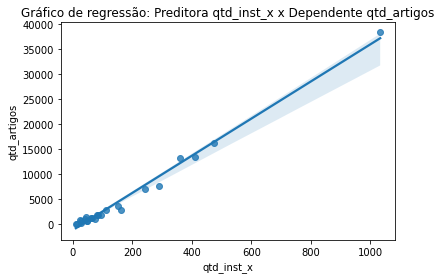

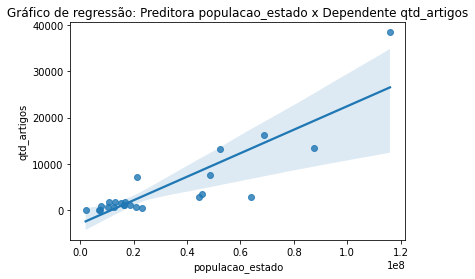

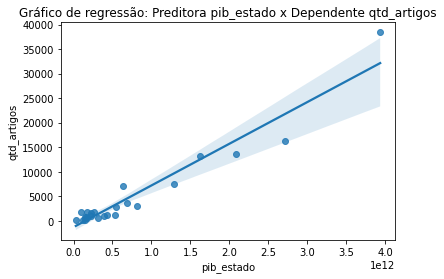

In [ ]:
# Plotando gráficos de regressão para cada variável individulamente
variables = ['qtd_inst_x','populacao_estado','pib_estado']

for var in variables:
  plt.figure()
  ax = sns.regplot(x=var,y='qtd_artigos',data=caso1_final).set(title=f'Gráfico de regressão: Preditora {var} x Dependente qtd_artigos')
  plt.show()

Os gráficos acima registram a situação de linearidade entre as variáveis preditoras e a variável dependente (qtd_artigos).

In [ ]:
# Extraindo mais informações com a regressão múltipla
x = caso1_final.drop(caso1_final.columns[[0,2]], axis=1)
y = caso1_final['qtd_artigos']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Coletando o coeficiente das variáveis independentes
variaveis_i = x.columns
model_coef = modelo.coef_
print('Tabela de Coeficientes\n')
compa_coef = pd.DataFrame(data=model_coef, index=variaveis_i, columns=['Valor coeficientes'])
print(compa_coef)
print('\n')

Tabela de Coeficientes

                  Valor coeficientes
qtd_inst_x              3.947374e+01
populacao_estado       -4.138851e-05
pib_estado              4.975769e-10




A tabela acima evidenciou que a variável de população não possui grande correlação com a quantidade de artigos, o que já ocorre com quantidade de instituições do Estado e com o PIB do Estado, sendo este o fator que mais afeto a variável dependente.

In [ ]:
# Calcula o R² e Intercepto
r_sq = modelo.score(x,y)
print('Coeficiente de Determinação (R²): ', r_sq)
print('Intercepto: ', modelo.intercept_)

# Analisando o modelo com o método dos mínimos quadrados ordinários
X = np.column_stack((caso1_final['qtd_inst_x'],caso1_final['populacao_estado'],caso1_final['pib_estado']))
y = caso1_final['qtd_artigos']
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

Coeficiente de Determinação (R²):  0.9916870950855605
Intercepto:  -581.5547355026547
                            OLS Regression Results                            
Dep. Variable:            qtd_artigos   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     822.0
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.19e-21
Time:                        00:54:52   Log-Likelihood:                -192.76
No. Observations:                  24   AIC:                             393.5
Df Residuals:                      20   BIC:                             398.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

O registro de R² como 0.992 é um ótimo sinal de que a regressão apresentação boa acurácia em seu teste.

---
    Caso 2
- Variável dependente: número de instituições por estado
- Variáveis preditoras: PIB somado do estado, quantidade média de estabelecimentos do estado
---

Os códigos a seguir consistem na manipulação dos DataFrames de modo a concentrar em uma única tabela todas as variáveis necessárias para a análise do caso 1 (no caso, a tabela final é a caso2_final).

In [ ]:
instituicoes_pivo = instituicoes.groupby('id_state')['id_state'].count().reset_index(name='qtd_inst')
instituicoes_pivo['id_state'].astype(str)

pib_pivo = pib_municipios
pib_pivo = pib_pivo.groupby('Código da Unidade da Federação')['Produto Interno Bruto per capita\n(R$ 1,00)'].mean().reset_index(name='pib_estado').round(2)
pib_pivo['Código da Unidade da Federação'].astype(str)

a_2015 = estab2015[['Município','Total']]
a_2015.rename(columns={'Total': '#estab_2015'}, inplace = True)
a_2015['Município'] = a_2015['Município'].map(lambda x: x[3:])

a_2015 = a_2015.loc[a_2015['#estab_2015'] > 0].reset_index(drop=True)

resultado_teste = pib_municipios.merge(a_2015, left_on='Nome do Município', right_on='Município')
resultado_teste = resultado_teste[['Município','#estab_2015','Código da Unidade da Federação']].groupby(['Município','#estab_2015','Código da Unidade da Federação'])['Município'].unique().reset_index(name='ok')
resultado_teste = resultado_teste[['Município','#estab_2015','Código da Unidade da Federação']]
resultado_teste = resultado_teste.groupby('Código da Unidade da Federação')['#estab_2015'].sum().reset_index(name='qtd_estab_estado_2015')
resultado_teste['Código da Unidade da Federação'].astype(str)

caso2_v1 = pd.merge(instituicoes_pivo,pib_pivo,left_on='id_state', right_on='Código da Unidade da Federação')
caso2_v2 = pd.merge(caso2_v1,resultado_teste,on='Código da Unidade da Federação')
caso2_final = caso2_v2[['id_state','qtd_inst','pib_estado','qtd_estab_estado_2015']]
caso2_final

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-193-e63605db4ee2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_2015['Município'] = a_2015['Município'].map(lambda x: x[3:])


,id_state,qtd_inst,pib_estado,qtd_estab_estado_2015
0,11,27,14540.27,25491.0
1,13,62,8315.83,23807.0
2,15,26,10198.73,27496.0
3,16,14,13390.62,1784.0
4,17,10,12621.01,27727.0
5,21,47,6524.57,26547.0
6,22,48,6273.23,26406.0
7,23,111,7075.94,99778.0
8,24,43,9443.20,46792.0
9,25,80,7180.40,48011.0


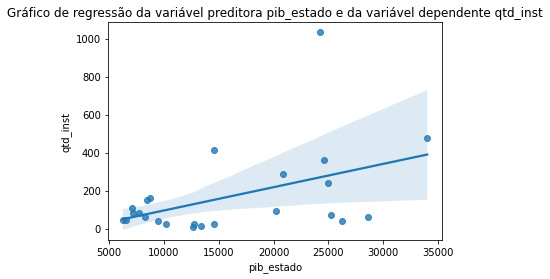

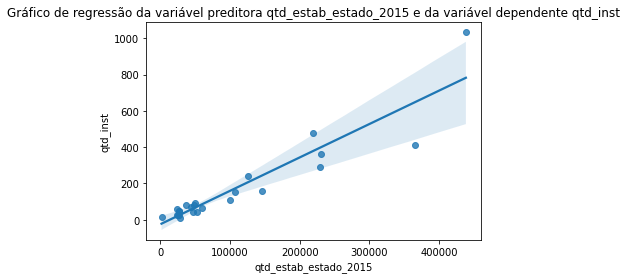

In [ ]:
# Plotando gráficos de regressão para cada variável individulamente
variables = ['pib_estado','qtd_estab_estado_2015']

for var in variables:
  plt.figure()
  ax = sns.regplot(x=var,y='qtd_inst',data=caso2_final).set(title=f'Gráfico de regressão da variável preditora {var} e da variável dependente qtd_inst')
  plt.show()

Os gráficos acima registram a situação de linearidade entre as variáveis preditoras e a variável dependente (qtd_instituicoes).

In [ ]:
# Extraindo mais informações com a regressão múltipla
x = caso2_final.drop(caso2_final.columns[[0,1]], axis=1)
y = caso2_final['qtd_inst']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Coletando o coeficiente das variáveis independentes
variaveis_i = x.columns
model_coef = modelo.coef_
print('Tabela de Coeficientes\n')
compa_coef = pd.DataFrame(data=model_coef, index=variaveis_i, columns=['Valor coeficientes'])
print(compa_coef)
print('\n')

Tabela de Coeficientes

                       Valor coeficientes
pib_estado                       0.000472
qtd_estab_estado_2015            0.002179




A tabela acima evidenciou que as variáveis preditoras influenciam a variável dependente de certo modo, mas não de maneira muito expressiva. Nesse sentido, a variável quantidade de estabelecimentos influencia a quantidade de instituições com mais força que o PIB do Estado.

In [ ]:
# Calcula o R² e Intercepto
r_sq = modelo.score(x,y)
print('Coeficiente de Determinação (R²): ', r_sq)
print('Intercepto: ', modelo.intercept_)

# Analisando o modelo com o método dos mínimos quadrados ordinários
X = np.column_stack((caso2_final['pib_estado'],caso2_final['qtd_estab_estado_2015']))
y = caso2_final['qtd_inst']
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

Coeficiente de Determinação (R²):  0.8291879289841255
Intercepto:  -49.92810719970788
                            OLS Regression Results                            
Dep. Variable:               qtd_inst   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     70.99
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           4.53e-10
Time:                        23:32:26   Log-Likelihood:                -139.15
No. Observations:                  24   AIC:                             284.3
Df Residuals:                      21   BIC:                             287.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

O registro de R² como 0.871 é um ótimo sinal de que a regressão apresentação boa acurácia em seu teste.

## **Conclusões alcançadas**

As conclusões obtidas foram descobertas nas Etapas 2 e 3 do desenvolvimento.

- O segundo agrupamento da Etapa 2, em que foram elencadas posições das instituições conforme produção de artigos e PIB de sua mesorregião, nos levou à conclusão que os Estados de **São Paulo**, **Minas Gerais** e **Rio Grande do Sul** são os territórios que mais concentram mesorregiões ricas com instituições de alta produção acadêmica.

- O terceiro agrupamento da Etapa 2, em que foram listados o número total de estabelecimentos entre 2010 e 2015, evidenciou que a crescente do número de estabelecimentos é o caso comum nos municípios brasileiros, com poucos casos de aparições de uma cidade com menos estabelecimentos em um ano em relação ao anterior.

- O caso 1 da Etapa 3 evidenciou que a **quantidade de artigos de uma instituição** possui alta correlação com o **número de instituições de seu Estado** além do **PIB estadual**. Por outro lado, há baixa correlação entre essa quantidade e o **número da população do Estado**.

- O caso 2 da Etapa 3 evidenciou que o **número de instituições de um Estado** está altamente correlacionada com o **PIB estadual** e o **número de estabelecimentos do Estado**, sendo o segundo fator mais impactante que o primeiro.

